In [1]:
import numpy as np

In [2]:
db = np.load('data.npz')
db.files

['y', 'x2', 'x2_test', 'x1', 'y_test', 'x1_test']

In [3]:
x1_train = db['x1']
x2_train = db['x2']
y_train = db['y']
train_size = y_train.size
x1_test = db['x1_test']
x2_test = db['x2_test']
y_test = db['y_test']
test_size = y_test.size

In [4]:
def poly_features(x1,x2,degree):
    s = degree + 1
    col = []
    features = []
    for i in range(0,s):
        for j in range(0,s-i):
            features.append((x1**i)*(x2**j))
            col.append((i,j))
    return {'colunm':col, 'matrix' : np.column_stack(features)}

In [5]:
def multivar_poly_regression(x,y):
    x_pinv = np.linalg.pinv(x)
    w = np.matmul(x_pinv,y)
    return w

In [6]:
def sum_squere_error (y1, y2):
    return sum([(y1[i]-y2[i])**2 for i in range(0,y1.size)])

# a) linear regresssion

In [7]:
x_mat1 = poly_features(x1_train,x2_train,1)
reg1 = multivar_poly_regression(x_mat1['matrix'],y_train)
reg1

array([-4226.07005149,   446.63582426,   537.30127365])

In [8]:
y_hat_train1 = np.matmul(x_mat1['matrix'], reg1)
SSEtrain1 = sum_squere_error(y_hat_train1, y_train)
SSEtrain1

18317759690.368008

In [9]:
test_mat1 = poly_features(x1_test, x2_test, 1)
y_hat_test1 = np.matmul(test_mat1['matrix'], reg1)
SSEtest1 = sum_squere_error(y_hat_test1, y_test)
SSEtest1 

12944759955.772043

# a) 3rd degree polynomial regression

In [10]:
x_mat2 = poly_features(x1_train, x2_train,3)
reg2 = multivar_poly_regression(x_mat2['matrix'], y_train)
reg2

array([ 1.00000000e+00,  3.62376795e-13,  2.00000000e+00, -4.12170298e-15,
        3.00000000e+00,  6.03961325e-14,  4.00000000e+00,  6.75015599e-14,
       -7.66053887e-15,  2.55351296e-15])

In [11]:
y_hat_train2 = np.matmul(x_mat2['matrix'], reg2)
SSEtrain2 = sum_squere_error(y_hat_train2, y_train)
SSEtrain2

1.6877332437997384e-18

In [12]:
test_mat2 = poly_features(x1_test, x2_test, 3)
y_hat_test2 = np.matmul(test_mat2['matrix'], reg2)
SSEtest2 = sum_squere_error(y_hat_test2, y_test)
SSEtest2 

7.636451083577081e-19

# a) 5th degree polynomial regression

In [13]:
x_mat3 = poly_features(x1_train, x2_train,5)
reg3 = multivar_poly_regression(x_mat3['matrix'], y_train)
reg3

array([ 1.00000000e+00, -3.41628947e-11,  2.00000000e+00,  1.11910481e-13,
       -8.71525074e-15,  2.24646690e-16,  3.00000000e+00,  8.77520279e-12,
        4.00000000e+00, -5.55111512e-16,  2.51534904e-17,  3.38218342e-12,
       -1.56319402e-13,  1.16573418e-14, -9.04658293e-16, -2.06057393e-13,
       -9.76996262e-15,  5.75928194e-16,  4.26325641e-14,  8.29197822e-16,
       -1.24900090e-15])

In [14]:
y_hat_train3 = np.matmul(x_mat3['matrix'], reg3)
SSEtrain3 = sum_squere_error(y_hat_train3, y_train)
SSEtrain3

7.823644442756832e-17

In [15]:
test_mat3 = poly_features(x1_test, x2_test, 5)
y_hat_test3 = np.matmul(test_mat3['matrix'], reg3)
SSEtest3 = sum_squere_error(y_hat_test3, y_test)
SSEtest3 

6.206512135546437e-17

# b) linear regression

In [16]:
import matplotlib.pyplot as plt

In [17]:
def grad_descent(x, y, rate, ite):
    gamma = rate
    n = y.size
    w = np.random.randn(x[1].size)
    counter = 0
    mse =[]
    i = []
    while (counter < ite):
        MSE = sum_squere_error(np.matmul(x, w),y)/n
        i.append(counter)
        mse.append(MSE)
        xw =np.matmul(x,w)
        grad = np.matmul(x.T, y - xw)
        w = w + gamma * grad
        counter += 1 
    MSE = sum_squere_error(np.matmul(x, w),y)/n
    mse.append(MSE)
    i.append(counter)
    return {'iteration': i, 'weight': w , 'mse' :mse}

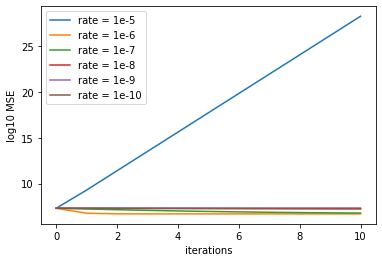

In [18]:
plt.xlabel("iterations")
plt.ylabel("log10 MSE")
for i in range(5,11):
    gd1 = grad_descent(x_mat1['matrix'],y_train,0.1**i,10)
    plt.plot(gd1['iteration'], np.log10(gd1['mse']),label='rate = 1e-{}'.format(i))
plt.legend()
#plt.savefig('11.png',dpi=300)

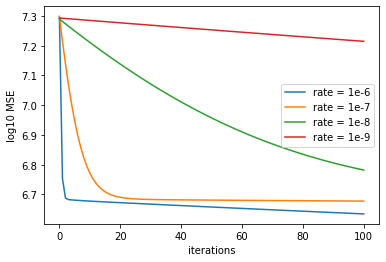

In [19]:
plt.xlabel("iterations")
plt.ylabel("log10 MSE")
for i in range(6,10):
    gd1 = grad_descent(x_mat1['matrix'],y_train,0.1**i,100)
    plt.plot(gd1['iteration'], np.log10(gd1['mse']),label='rate = 1e-{}'.format(i))
plt.legend()
#plt.savefig('12.png',dpi=300)

In [20]:
gd1 = grad_descent(x_mat1['matrix'],y_train,0.1**7,100)
w1 = gd1['weight']
w1

array([-22.08027839, 274.66577143, 154.63077927])

In [21]:
y_gd_train1 = np.matmul(x_mat1['matrix'], w1)
SSEtrainGD1 = sum_squere_error(y_gd_train1, y_train)
SSEtrainGD1

38097270716.17465

In [22]:
y_gd_test1 = np.matmul(test_mat1['matrix'], w1)
SSEtestGD1 = sum_squere_error(y_gd_test1, y_test)
SSEtestGD1

25775186283.36409

# b) 3rd degree polynomial regression

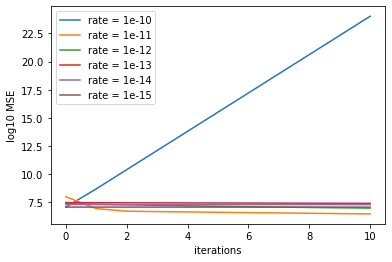

In [23]:
plt.xlabel("iterations")
plt.ylabel("log10 MSE")
for i in range(10,16):
    gd2 = grad_descent(x_mat2['matrix'],y_train,0.1**i,10)
    plt.plot(gd2['iteration'], np.log10(gd2['mse']),label='rate = 1e-{}'.format(i))
plt.legend()
#plt.savefig('21.png',dpi=300)

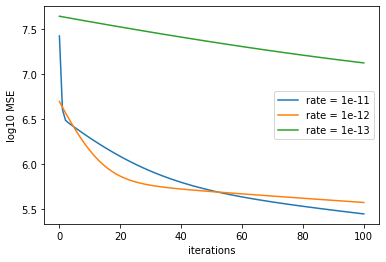

In [24]:
plt.xlabel("iterations")
plt.ylabel("log10 MSE")
for i in range(11,14):
    gd2 = grad_descent(x_mat2['matrix'],y_train,0.1**i,100)
    plt.plot(gd2['iteration'], np.log10(gd2['mse']),label='rate = 1e-{}'.format(i))
plt.legend()
#plt.savefig('22.png',dpi=300)

In [25]:
gd2 = grad_descent(x_mat2['matrix'],y_train,0.1**11,100)
w2 = gd2['weight']
w2

array([-0.64149439, -0.47342055,  0.09590134,  0.41992228, -2.04442711,
        1.48988695,  2.09382559, -1.65682143,  1.20523848,  1.91695605])

In [26]:
y_gd_train2 = np.matmul(x_mat2['matrix'], w2)
SSEtrainGD2 = sum_squere_error(y_gd_train2, y_train)
SSEtrainGD2

2872831801.8607516

In [27]:
y_gd_test2 = np.matmul(test_mat2['matrix'], w2)
SSEtestGD2 = sum_squere_error(y_gd_test2, y_test)
SSEtestGD2

1882719031.7481675

# b) 5th degree polynomial regression

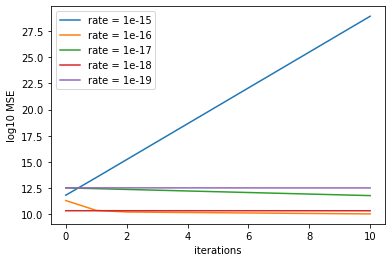

In [28]:
plt.xlabel("iterations")
plt.ylabel("log10 MSE")
for i in range(15,20):
    gd3 = grad_descent(x_mat3['matrix'],y_train,0.1**i,10)
    plt.plot(gd3['iteration'], np.log10(gd3['mse']),label='rate = 1e-{}'.format(i))
plt.legend()
#plt.savefig('31.png',dpi=300)

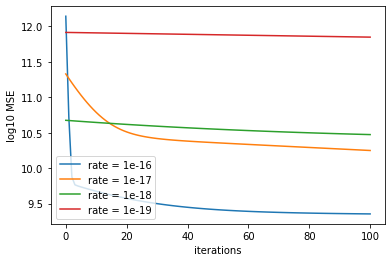

In [29]:
plt.xlabel("iterations")
plt.ylabel("log10 MSE")
for i in range(16,20):
    gd3 = grad_descent(x_mat3['matrix'],y_train,0.1**i,100)
    plt.plot(gd3['iteration'], np.log10(gd3['mse']),label='rate = 1e-{}'.format(i))
plt.legend()
#plt.savefig('32.png',dpi=300)

In [30]:
gd3 = grad_descent(x_mat3['matrix'],y_train,0.1**16,100)
w3 = gd3['weight']
w3

array([ 0.46466906,  0.04814824, -0.21163878, -0.47689156, -1.1021772 ,
        0.05243408, -0.51706551, -0.15634142,  0.81922125, -1.62995483,
        0.13774146,  0.22129815,  0.63924855, -0.88840527,  0.59265066,
        2.61643856, -0.03705765, -1.44369884,  0.64483909,  0.74695394,
       -0.97686382])

In [31]:
y_gd_train3 = np.matmul(x_mat3['matrix'], w3)
SSEtrainGD3 = sum_squere_error(y_gd_train3, y_train)
SSEtrainGD3

9628195119367.512

In [32]:
y_gd_test3 = np.matmul(test_mat3['matrix'], w3)
SSEtestGD3 = sum_squere_error(y_gd_test3, y_test)
SSEtestGD3

12180370540265.457

# c) linear regression

In [33]:
def reg_multivar_poly_regression(x, y, l):
    r = np.matmul(x.transpose(), x) + l*np.identity(x[0].size)
    r[0] -= l
    r = np.matmul(np.linalg. inv(r), x.transpose())
    w = np.matmul((r),y)
    return w

In [34]:
def cross_val(x, y, k, l):
    SSE_train = 0
    SSE_test = 0
    n = y.size
    m = n//k
    temp = [[x[i], y[i]] for i in range(n)]
    np.random.shuffle(temp)
    local_x = np.array([temp[i][0] for i in range(n)])
    local_y = np.array([temp[i][1] for i in range(n)])
    
    for i in range(0,k):
        row_f = i*m
        row_l = (i+1)*m
        
        kth_fold = [j for j in range(row_f,row_l)]
        
        val_set = local_x[row_f: row_l]
        val_set_y = local_y[row_f: row_l]

        train_set = np.concatenate((local_x[:row_f], local_x[row_l:]), axis=0)
        train_set_y = np.delete(local_y, kth_fold)
        
        w = reg_multivar_poly_regression(train_set, train_set_y, l)
        
        y_train_hat = np.matmul(train_set, w)
        y_val_hat = np.matmul(val_set, w)
        
        SSE_train += sum_squere_error(train_set_y, y_train_hat)
        SSE_test += sum_squere_error(val_set_y, y_val_hat)
        
    return {'SSEtrain': SSE_train/k , 'SSEvalidation': SSE_test/k}

In [35]:
SSEtrain_c1 = []
SSEval_c1 = []
for l in range(-4,5):
    reg1c = cross_val(x_mat1['matrix'], y_train,5, 10**l)
    SSEtrain_c1.append(reg1c['SSEtrain'])
    SSEval_c1.append(reg1c['SSEvalidation'])

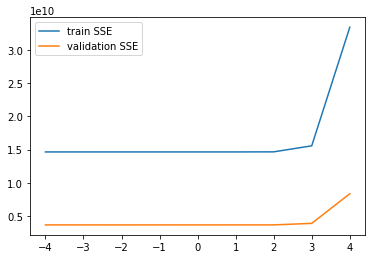

In [36]:
plt.plot(range(-4,5), SSEtrain_c1,label='train SSE')
plt.plot(range(-4,5), SSEval_c1,label='validation SSE')
plt.legend()
#plt.savefig('311.png',dpi=300)

In [37]:
reg1c = reg_multivar_poly_regression(x_mat1['matrix'], y_train, 10**-4)
y_train_hat = np.matmul(x_mat1['matrix'], reg1c)
y_test_hat = np.matmul(test_mat1['matrix'], reg1c)
SSEtrainc1 = sum_squere_error(y_train, y_train_hat)
SSEtestc1 = sum_squere_error(y_test, y_test_hat)
print(SSEtrainc1)
print(SSEtestc1)
print(SSEtrain_c1[0])
print(SSEval_c1[0])
reg1c

18317759690.367973
12944760110.83464
14651324730.91531
3670043788.025161


array([-4226.06995749,   446.63582031,   537.30126523])

# c) 3rd degree polynomial regression¶

In [38]:
SSEtrain_c2 = []
SSEval_c2 = []
for l in range(-4,5):
    reg2c = cross_val(x_mat2['matrix'], y_train,5, 10**l)
    SSEtrain_c2.append(reg2c['SSEtrain'])
    SSEval_c2.append(reg2c['SSEvalidation'])

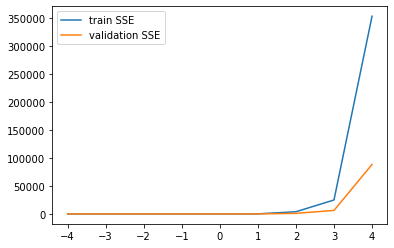

In [39]:
plt.plot(range(-4,5), SSEtrain_c2,label='train SSE')
plt.plot(range(-4,5), SSEval_c2,label='validation SSE')
plt.legend()
#plt.savefig('312.png',dpi=300)

In [40]:
reg2c = reg_multivar_poly_regression(x_mat2['matrix'], y_train, 10**-4)
y_train_hat = np.matmul(x_mat2['matrix'], reg2c)
y_test_hat = np.matmul(test_mat2['matrix'], reg2c)
SSEtrainc2 = sum_squere_error(y_train, y_train_hat)
SSEtestc2 = sum_squere_error(y_test, y_test_hat)
print(SSEtrainc2)
print(SSEtestc2)
print(SSEtrain_c2[0])
print(SSEval_c2[0])
reg2c

9.982392722555469e-09
9.515612484722473e-09
1.2507476793264266e-08
3.1444955092089305e-09


array([ 1.00000981e+00, -1.67709653e-06,  2.00000010e+00, -2.09853337e-09,
        2.99999607e+00,  2.76810333e-07,  3.99999999e+00,  5.33582871e-07,
       -1.32669097e-08, -2.36764245e-08])

# c) 5th degree polynomial regression

In [41]:
SSEtrain_c3 = []
SSEval_c3 = []
for l in range(-4,5):
    reg3c = cross_val(x_mat3['matrix'], y_train,5, 10**l)
    SSEtrain_c3.append(reg3c['SSEtrain'])
    SSEval_c3.append(reg3c['SSEvalidation'])

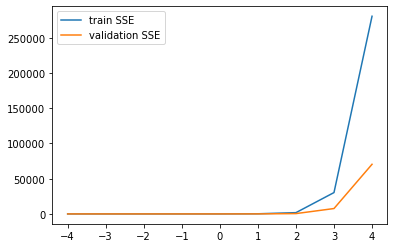

In [42]:
plt.plot(range(-4,5), SSEtrain_c3,label='train SSE')
plt.plot(range(-4,5), SSEval_c3,label='validation SSE')
plt.legend()
#plt.savefig('313.png',dpi=300)

In [43]:
reg3c = reg_multivar_poly_regression(x_mat3['matrix'], y_train, 10**-4)
y_train_hat = np.matmul(x_mat3['matrix'], reg3c)
y_test_hat = np.matmul(test_mat3['matrix'], reg3c)
SSEtrainc3 = sum_squere_error(y_train, y_train_hat)
SSEtestc3 = sum_squere_error(y_test, y_test_hat)
print(SSEtrainc3)
print(SSEtestc3)
print(SSEtrain_c3[0])
print(SSEval_c3[0])
reg3c

1.6958291308018977e-06
9.57101909929323e-06
6.495571521099052e-06
1.647542130942108e-06


array([ 1.00010918e+00, -8.92428231e-05,  2.00002674e+00, -3.37251546e-06,
        1.84798952e-07, -3.64004502e-09,  2.99994432e+00,  1.11192821e-05,
        3.99999894e+00,  4.95376987e-08, -8.83475505e-10,  1.85164678e-05,
       -1.70572619e-06,  7.06013821e-08, -1.14270759e-09, -3.06571614e-06,
        1.37700855e-07, -2.11165419e-09,  2.43517660e-07, -4.34835093e-09,
       -7.42576395e-09])